In [1]:
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

from hfnet.datasets.hpatches import Hpatches
from hfnet.evaluation.loaders import sift_loader, export_loader, fast_loader, harris_loader
from hfnet.evaluation.local_descriptors import evaluate

from utils import plot_images

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
data_config = {'make_pairs': True, 'shuffle': True}
dataset = Hpatches(**data_config)

In [10]:
config = {
    'id': 'sift_ratio_500-kpts',
    'predictor': sift_loader,
    'num_features': 500,
    'do_ratio_test': True,
    'correct_match_thresh': 3,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}

In [4]:
config = {
    'id': 'superpoint_dist_500-kpts',
    'experiment': 'super_point_pytorch/hpatches',
    'predictor': export_loader,
    'num_features': 500,
#    'keypoint_predictor': harris_loader,
#    'keypoint_config': {
#        'experiment': 'super_point_pytorch/hpatches',
#        'do_nms': True,
#        'nms_thresh': 4,
#        'remove_borders': 4,
#    },
    'do_nms': True,
    'nms_thresh': 4,
    'remove_borders': 4,
    'do_ratio_test': False,
    'correct_match_thresh': 3,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}

In [3]:
config = {
    'id': 'mobilenetvlad_l-14_dist_500-kpts-harris',
    'experiment': 'mobilenetvlad_depth-0.35/hpatches_layer-14',
    'predictor': export_loader,
    'num_features': 500,
    'keypoint_predictor': harris_loader,
    'keypoint_config': {
        'experiment': 'super_point_pytorch/hpatches',
        'do_nms': True,
        'nms_thresh': 4,
#        'remove_borders': 4,
    },
    'do_ratio_test': False,
    'correct_match_thresh': 3,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}

In [12]:
config = {
    'id': 'lfnet_ratio',
    'experiment': 'lfnet/hpatches_kpts-500',
    'predictor': export_loader,
    'num_features': 500,
    'remove_borders': 4,
    'do_ratio_test': True,
    'correct_match_thresh': 3,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}

In [ ]:
data_iter = dataset.get_test_set()
metrics, precision, recall, distances = evaluate(data_iter, config)
print('> {}'.format(config['id']))
for k, v in metrics.items():
    print('{:<25} {:.3f}'.format(k, v))
print(config)

# MobileNetVLAD

580it [02:05,  6.84it/s]


> mobilenetvlad_l-14_dist_500-kpts-sp
average_num_keypoints     476.794
homography_correctness    0.717
matching_score            0.325
inlier_ratio              0.477
mAP                       0.513
{'id': 'mobilenetvlad_l-14_dist_500-kpts-sp', 'experiment': 'mobilenetvlad_depth-0.35/hpatches_layer-14', 'predictor': <function export_loader at 0x2b4475c3e400>, 'num_features': 500, 'keypoint_predictor': <function export_loader at 0x2b4475c3e400>, 'keypoint_config': {'experiment': 'super_point_pytorch/hpatches', 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'keypoint_predictor': None}, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [01:59,  9.58it/s]

> mobilenetvlad_l-14_dist_500-kpts-harris
average_num_keypoints     403.463
homography_correctness    0.567
matching_score            0.260
inlier_ratio              0.427
mAP                       0.359
{'id': 'mobilenetvlad_l-14_dist_500-kpts-harris', 'experiment': 'mobilenetvlad_depth-0.35/hpatches_layer-14', 'predictor': <function export_loader at 0x2b8f5e720400>, 'num_features': 500, 'keypoint_predictor': <function harris_loader at 0x2b8f5e720378>, 'keypoint_config': {'experiment': 'super_point_pytorch/hpatches', 'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


# SuperPoint

580it [01:47, 10.14it/s]

> superpoint_ratio_500-kpts
average_num_keypoints     476.794
homography_correctness    0.809
matching_score            0.477
inlier_ratio              0.471
mAP                       0.796
{'id': 'superpoint_ratio_500-kpts', 'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2b4475c3e400>, 'num_features': 500, 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'do_ratio_test': True, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [01:50, 10.03it/s]

> superpoint_dist_500-kpts
average_num_keypoints     476.794
homography_correctness    0.817
matching_score            0.463
inlier_ratio              0.634
mAP                       0.794
{'id': 'superpoint_dist_500-kpts', 'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2b4475c3e400>, 'num_features': 500, 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [01:48, 10.41it/s]

> superpoint_dist_500-kpts_nms-8
average_num_keypoints     464.888
homography_correctness    0.822
matching_score            0.456
inlier_ratio              0.618
mAP                       0.797
{'id': 'superpoint_dist_500-kpts_nms-8', 'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2b4475c3e400>, 'num_features': 500, 'do_nms': True, 'nms_thresh': 8, 'remove_borders': 4, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [02:10,  7.98it/s]


> superpoint_dist_500-kpts-harris
average_num_keypoints     403.463
homography_correctness    0.662
matching_score            0.425
inlier_ratio              0.622
mAP                       0.702
{'id': 'superpoint_dist_500-kpts-harris', 'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2b8f5e720400>, 'num_features': 500, 'keypoint_predictor': <function harris_loader at 0x2b8f5e720378>, 'keypoint_config': {'experiment': 'super_point_pytorch/hpatches', 'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


# LF-Net

580it [01:17,  7.52it/s]


> lfnet_ratio
average_num_keypoints     500.000
homography_correctness    0.652
matching_score            0.303
inlier_ratio              0.301
mAP                       0.515
{'id': 'lfnet_ratio', 'experiment': 'lfnet/hpatches_kpts-500', 'predictor': <function export_loader at 0x2b4475c3e400>, 'num_features': 500, 'remove_borders': 4, 'do_ratio_test': True, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [01:19,  7.32it/s]

> lfnet
average_num_keypoints     500.000
homography_correctness    0.712
matching_score            0.283
inlier_ratio              0.460
mAP                       0.366
{'id': 'lfnet', 'experiment': 'lfnet/hpatches_kpts-500', 'predictor': <function export_loader at 0x2b4475c3e400>, 'num_features': 500, 'remove_borders': 4, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


# SIFT

580it [03:18,  4.00it/s]

> sift_ratio_500-kpts
average_num_keypoints     499.885
homography_correctness    0.707
matching_score            0.301
inlier_ratio              0.299
mAP                       0.592
{'id': 'sift_ratio_500-kpts', 'predictor': <function sift_loader at 0x2b96ba746510>, 'num_features': 500, 'do_ratio_test': True, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


In [ ]:
plt.figure(dpi=100)
plt.plot(recall, precision);
plt.xlabel('Recall'), plt.ylabel('Precision'); plt.title(config['id']);
for t in config['plot_match_thresh']:
    op_idx = np.min(np.where(distances > t))
    plt.plot(recall[op_idx], precision[op_idx], marker='o', color='k', markersize=3)
    plt.annotate(str(t), xy=(recall[op_idx], precision[op_idx]))

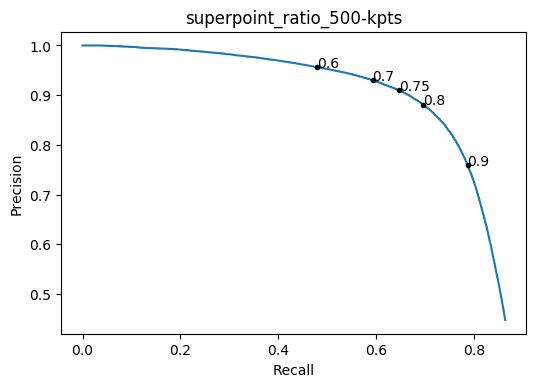

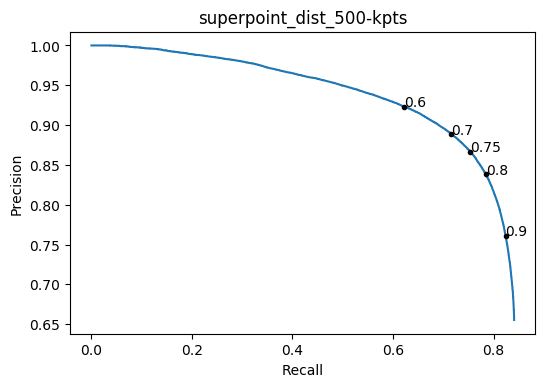

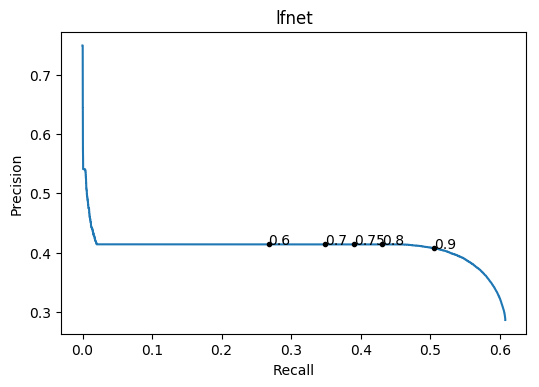

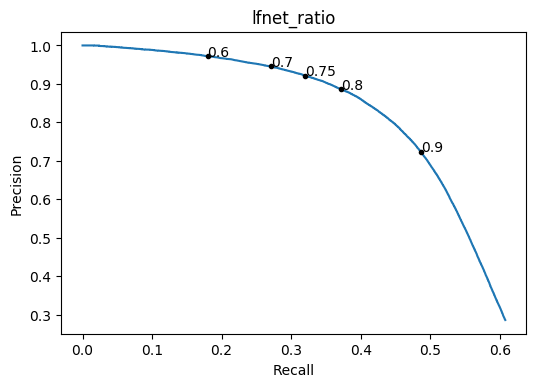

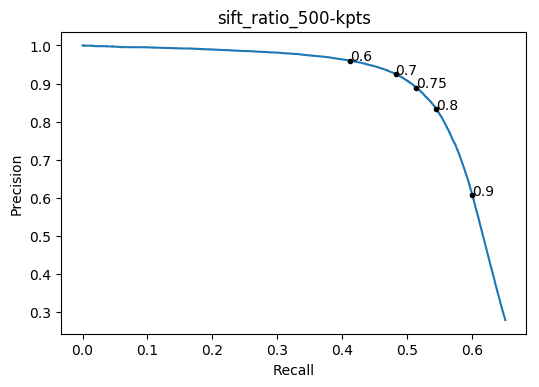

In [ ]:
plot_images([data['image_ref'],
             cv2.polylines(data['image'].copy(), [np.int32(corners1_gt)], True, 255, 3, cv2.LINE_AA)])

plot_images([data['image_ref'],
             cv2.polylines(data['image'].copy(), [np.int32(corners1)], True, 255, 3, cv2.LINE_AA)])